In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df1=pd.read_csv('F:/TensorFlow_FILES/DATA/lending_club_loan_two.csv')
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df1.shape

(396030, 27)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [6]:
df1.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


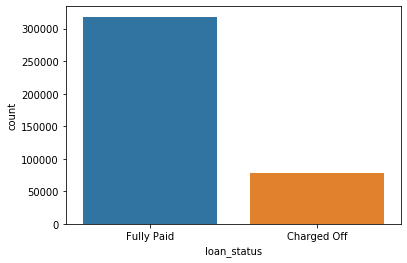

In [8]:
sns.countplot(x='loan_status',data=df1)

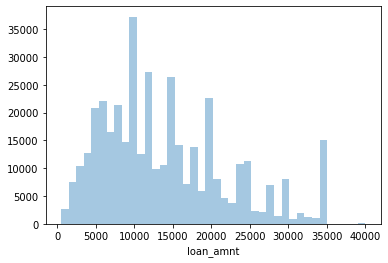

In [9]:
sns.distplot(df1['loan_amnt'],kde=False,bins=40)

In [10]:
df1.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [12]:
df1.corr().sort_values(by='loan_amnt',ascending=False)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035
mort_acc,0.222315,-0.082583,0.193694,0.236320,-0.025439,0.109205,0.011552,0.194925,0.007514,0.381072,1.000000,0.027239
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558


In [13]:
df1.corr()['loan_amnt'].sort_values()

pub_rec_bankruptcies   -0.106539
pub_rec                -0.077779
dti                     0.016636
revol_util              0.099911
int_rate                0.168921
open_acc                0.198556
mort_acc                0.222315
total_acc               0.223886
revol_bal               0.328320
annual_inc              0.336887
installment             0.953929
loan_amnt               1.000000
Name: loan_amnt, dtype: float64

(12.0, 0.0)

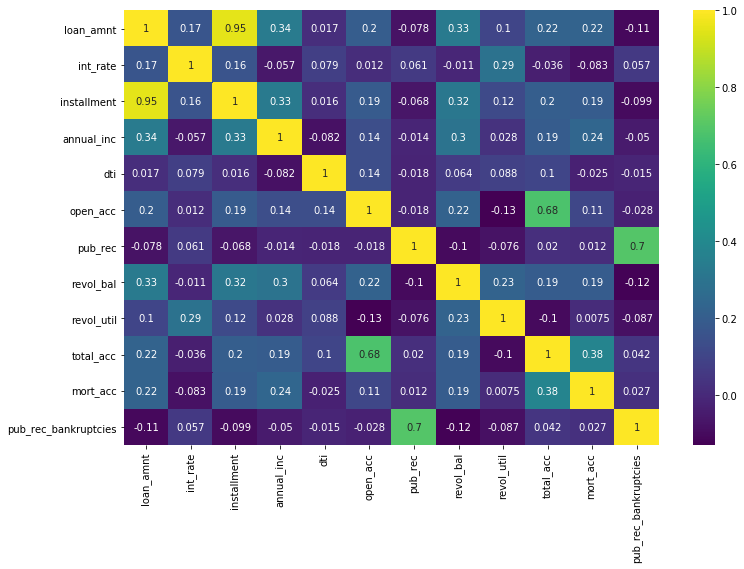

In [14]:
plt.figure(figsize=(12,8))
ax=sns.heatmap(df1.corr(),annot=True,cmap='viridis')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

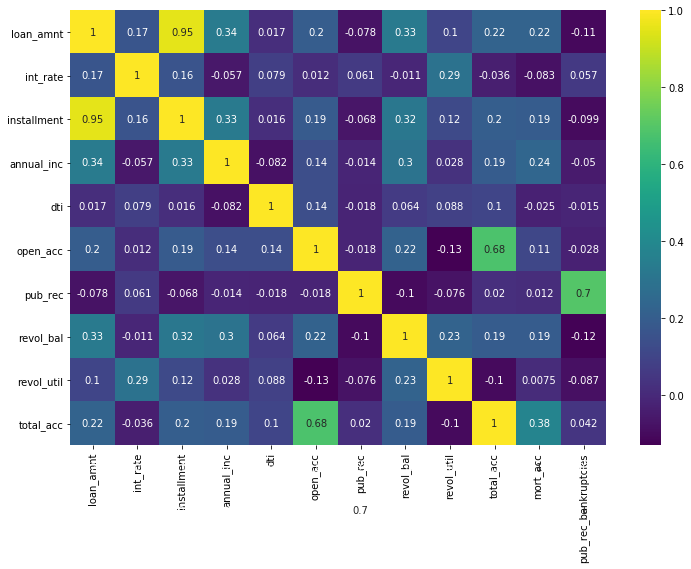

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)
plt.show()

In [16]:
df1.corr()['int_rate'].sort_values()

mort_acc               -0.082583
annual_inc             -0.056771
total_acc              -0.036404
revol_bal              -0.011280
open_acc                0.011649
pub_rec_bankruptcies    0.057450
pub_rec                 0.060986
dti                     0.079038
installment             0.162758
loan_amnt               0.168921
revol_util              0.293659
int_rate                1.000000
Name: int_rate, dtype: float64

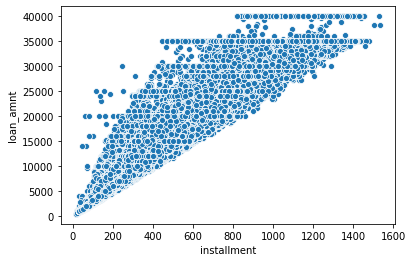

In [17]:
sns.scatterplot(x='installment',y='loan_amnt',data=df1)

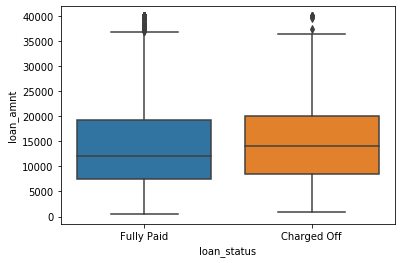

In [18]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df1)

In [19]:
df1.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


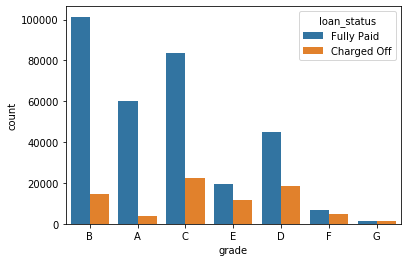

In [20]:
sns.countplot(x='grade',data=df1,hue='loan_status')

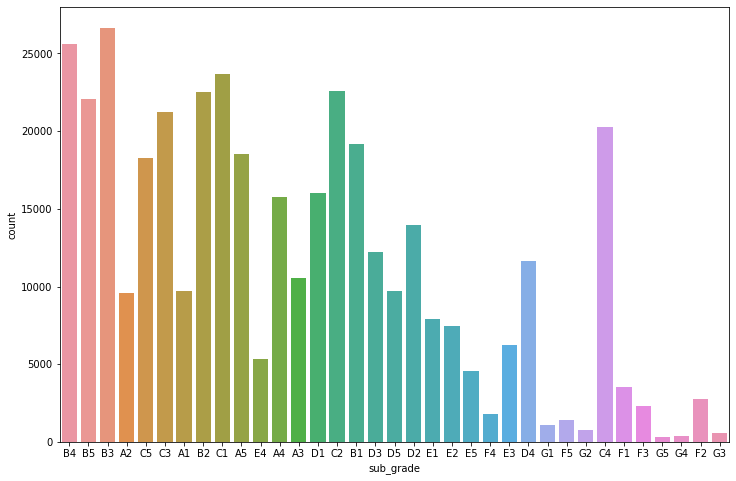

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade',data=df1)

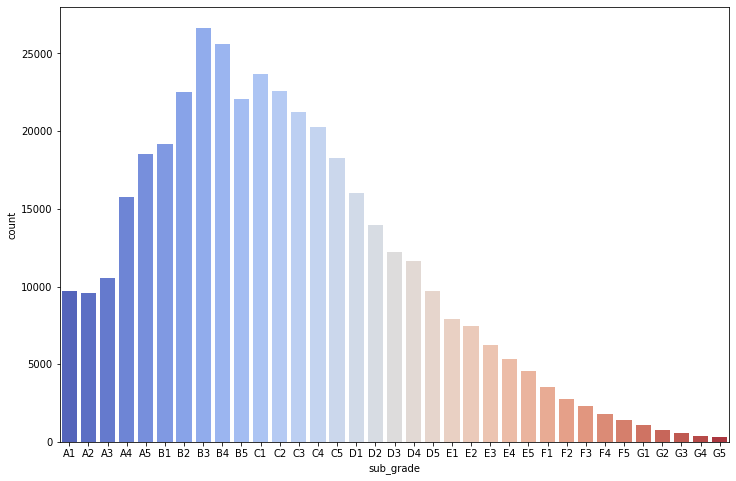

In [22]:
plt.figure(figsize=(12,8))
subgrade_order=sorted(df1['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df1,order=subgrade_order,palette='coolwarm')

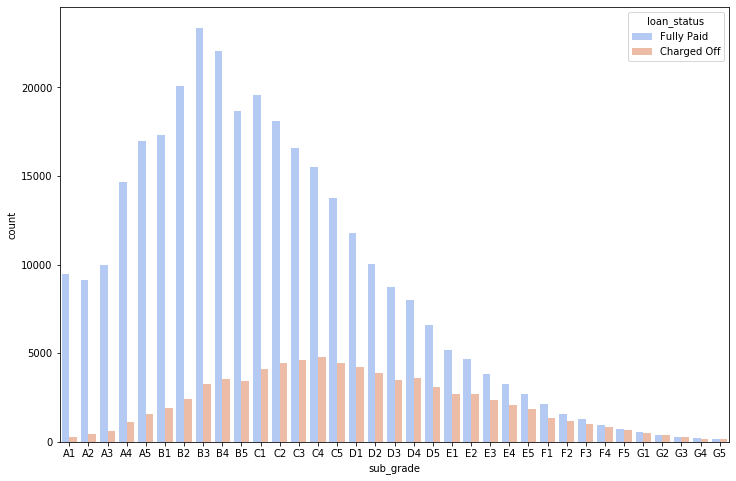

In [23]:
plt.figure(figsize=(12,8))
subgrade_order=sorted(df1['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df1,order=subgrade_order,palette='coolwarm',hue='loan_status')

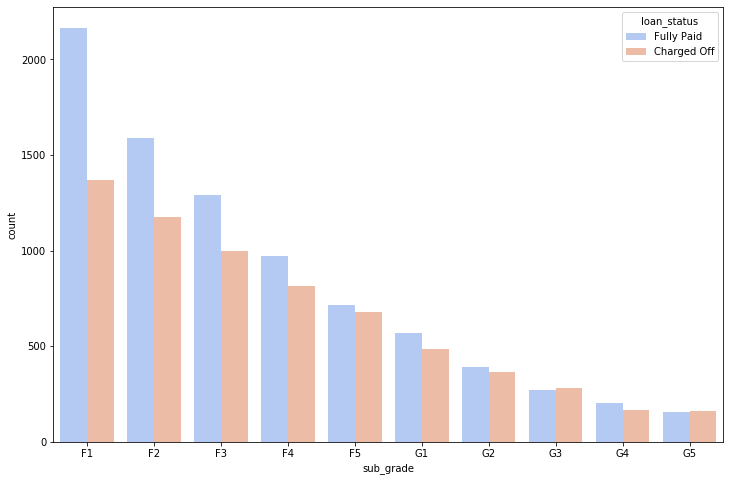

In [24]:
f_g=df1[(df1['grade']=='F') | (df1['grade']=='G')]
plt.figure(figsize=(12,8))
subgrade_order=sorted(f_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_g,order=subgrade_order,palette='coolwarm',hue='loan_status')

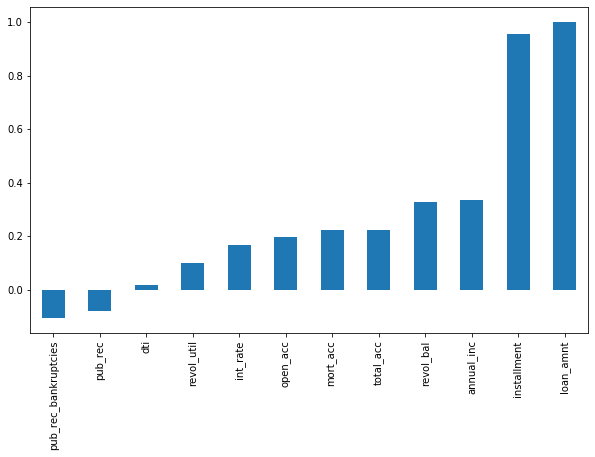

In [25]:
plt.figure(figsize=(10,6))
df1.corr()['loan_amnt'].sort_values().plot(kind='bar')

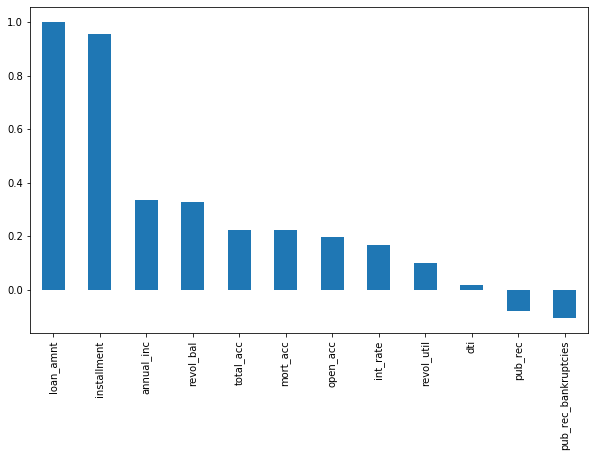

In [26]:
plt.figure(figsize=(10,6))
df1.corr()['loan_amnt'].sort_values(ascending=False).plot(kind='bar')

In [27]:
df1.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"


In [28]:
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

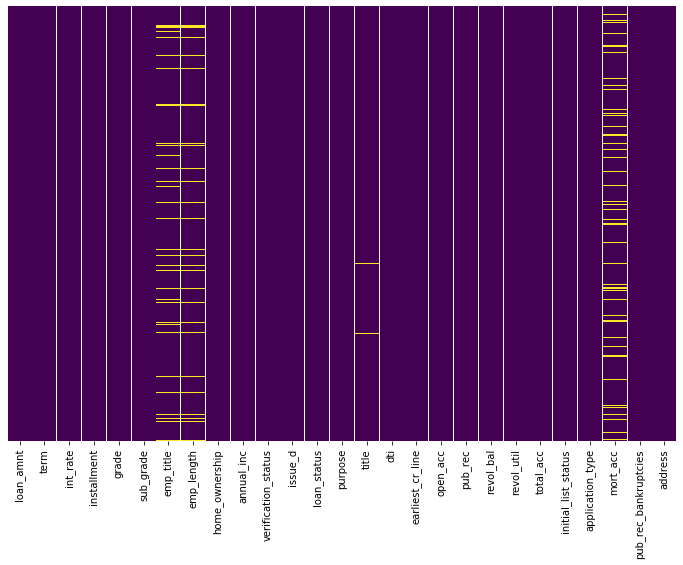

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
df1=df1.drop(['emp_title'],axis=1)

In [31]:
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [32]:
df1['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [33]:
df1['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [34]:
df1[df1['loan_status']=='Charged Off'].groupby('emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,...,5154,5154,5154,5148,5154,5154,5154,4732,5141,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,...,23215,23215,23215,23200,23215,23215,23215,21883,23198,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,...,6924,6924,6924,6918,6924,6924,6924,6383,6916,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,...,6182,6182,6182,6179,6182,6182,6182,5660,6179,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,...,4608,4608,4608,4603,4608,4608,4608,4140,4598,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5092,5088,5092,5092,5092,4666,5090,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,...,3943,3943,3943,3942,3943,3943,3943,3639,3940,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,...,4055,4055,4055,4052,4055,4055,4055,3770,4052,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,...,3829,3829,3829,3823,3829,3829,3829,3609,3826,3829


In [35]:
df1[df1['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [36]:
df1[df1['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [37]:
df1=df1.drop(['emp_length'],axis=1)

In [38]:
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [39]:
df1.shape

(396030, 25)

In [40]:
df1=df1.drop(['title'],axis=1)

In [41]:
df1.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [42]:
df1.shape

(396030, 24)

In [43]:
df1['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [44]:
df1.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [45]:
df1.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077
...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000


In [46]:
df1.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [47]:
total_acc_avg=df1.groupby('total_acc').mean()['mort_acc']

In [48]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [49]:
df1['mort_acc']=df1.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [50]:
df1.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [51]:
df1=df1.dropna()

In [52]:
df1.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [53]:
df1.shape

(395219, 24)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
loan_amnt               395219 non-null float64
term                    395219 non-null object
int_rate                395219 non-null float64
installment             395219 non-null float64
grade                   395219 non-null object
sub_grade               395219 non-null object
home_ownership          395219 non-null object
annual_inc              395219 non-null float64
verification_status     395219 non-null object
issue_d                 395219 non-null object
loan_status             395219 non-null object
purpose                 395219 non-null object
dti                     395219 non-null float64
earliest_cr_line        395219 non-null object
open_acc                395219 non-null float64
pub_rec                 395219 non-null float64
revol_bal               395219 non-null float64
revol_util              395219 non-null float64
total_acc               395219 non

In [55]:
df1.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [56]:
df1['term']=df1['term'].apply(lambda term: int(term[:3]))

In [57]:
df1['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [58]:
df1['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [59]:
df1=df1.drop(['grade'],axis=1)

In [60]:
df1.shape

(395219, 23)

In [61]:
sub_grade_df=pd.get_dummies(df1['sub_grade'],drop_first=True)
sub_grade_df.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df1=pd.concat([df1,sub_grade_df],axis=1)

In [63]:
df1.shape

(395219, 57)

In [64]:
df1=df1.drop(['sub_grade'],axis=1)

In [65]:
df1.shape

(395219, 56)

In [66]:
dummies=pd.get_dummies(df1[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
dummies.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df1=pd.concat([df1,dummies],axis=1)
df1.shape

(395219, 74)

In [68]:
df1=df1.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
df1.shape

(395219, 70)

In [69]:
df1.head(3)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df1['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [71]:
df1['home_ownership']=df1['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [72]:
df1['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [73]:
home_df=pd.get_dummies(df1['home_ownership'],drop_first=True)
home_df.head()

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [74]:
df1=pd.concat([df1,home_df],axis=1)
df1.shape

(395219, 73)

In [75]:
df1.head(3)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,1


In [76]:
df1=df1.drop(['home_ownership'],axis=1)
df1.shape

(395219, 72)

In [77]:
df1['zipcode']=df1['address'].apply(lambda address:address[-5:])

In [78]:
df1['zipcode']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zipcode, Length: 395219, dtype: object

In [79]:
zipcode_df=pd.get_dummies(df1['zipcode'],drop_first=True)
zipcode_df.head()

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [80]:
df1.shape

(395219, 73)

In [81]:
df1=pd.concat([df1,zipcode_df],axis=1)

In [82]:
df1.shape

(395219, 82)

In [83]:
df1=df1.drop(['address'],axis=1)

In [84]:
df1.shape

(395219, 81)

In [85]:
df1=df1.drop(['zipcode'],axis=1)

In [86]:
df1.shape

(395219, 80)

In [87]:
df1.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0


In [88]:
df1=df1.drop(['issue_d'],axis=1)

In [89]:
df1.shape

(395219, 79)

In [90]:
df1['earliest_cr_line']=df1['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [91]:
df1.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
loan_amnt                              395219 non-null float64
term                                   395219 non-null int64
int_rate                               395219 non-null float64
installment                            395219 non-null float64
annual_inc                             395219 non-null float64
loan_status                            395219 non-null object
dti                                    395219 non-null float64
earliest_cr_line                       395219 non-null int64
open_acc                               395219 non-null float64
pub_rec                                395219 non-null float64
revol_bal                              395219 non-null float64
revol_util                             395219 non-null float64
total_acc                              395219 non-null float64
mort_acc                               395219 non-null float64
pub_rec_bank

In [93]:
df1['loan_repaid']=df1['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [94]:
df1[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


In [95]:
df1.shape

(395219, 80)

In [96]:
df1=df1.drop(['loan_status'],axis=1)
df1.shape

(395219, 79)

In [97]:
df1.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,loan_repaid
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,1
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Extracting Features from our Lending Club Dataset after completing Data Cleaning Task.

In [98]:
x=df1.drop(['loan_repaid'],axis=1)
x.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
x.shape

(395219, 78)

In [100]:
x=x.values
x

array([[1.000e+04, 3.600e+01, 1.144e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+03, 3.600e+01, 1.199e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.560e+04, 3.600e+01, 1.049e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+03, 3.600e+01, 9.990e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.100e+04, 6.000e+01, 1.531e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+03, 3.600e+01, 1.361e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [101]:
y=df1['loan_repaid']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: loan_repaid, dtype: int64

In [102]:
y.shape

(395219,)

In [103]:
y=y.values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
#Taking a sample of 20 percent from our entire dataset.

In [104]:
df2=df1.sample(frac=0.2,random_state=101)
df2.shape

(79044, 79)

In [105]:
sample_x=df2.drop(['loan_repaid'],axis=1)
sample_x.shape

(79044, 78)

In [106]:
sample_x=sample_x.values
sample_x

array([[1.480e+04, 3.600e+01, 1.849e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.100e+04, 6.000e+01, 1.757e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.200e+04, 6.000e+01, 7.890e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+03, 3.600e+01, 1.144e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.010e+04, 6.000e+01, 2.449e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.440e+04, 6.000e+01, 9.670e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [107]:
sample_y=df2['loan_repaid']
sample_y.shape

(79044,)

In [108]:
sample_y=sample_y.values
sample_y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [109]:
#Split dataset into train & test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sample_x,sample_y,test_size=0.3,random_state=101)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(55330, 78) (23714, 78) (55330,) (23714,)


In [110]:
#Data Normalization with MinMaxScaler to prevent data leak.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
#Part One
#First ANN Model

In [111]:
#Import Keras Libraries for creating Neural Networks.
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization
from keras import optimizers

In [112]:
def my_basic_model():
    model=Sequential()
    model.add(Dense(78,input_shape=(78,),activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(39,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(19,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))
    adam=optimizers.Adam(lr=0.01)
    model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [113]:
model=my_basic_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 78)                6162      
_________________________________________________________________
batch_normalization (BatchNo (None, 78)                312       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                3081      
_________________________________________________________________
dropout (Dropout)            (None, 39)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                760       
_________________________________________________________________
batch_normalization_1 (Batch (None, 19)                76        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

In [114]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=200,verbose=1)

Epoch 1/200
865/865 [==============================] - 6s 5ms/step - loss: 0.3332 - accuracy: 0.8578 - val_loss: 0.2660 - val_accuracy: 0.8871
Epoch 2/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2738 - accuracy: 0.8841 - val_loss: 0.2642 - val_accuracy: 0.8869
Epoch 3/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2748 - accuracy: 0.8841 - val_loss: 0.2615 - val_accuracy: 0.8877
Epoch 4/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2678 - accuracy: 0.8862 - val_loss: 0.2620 - val_accuracy: 0.8877
Epoch 5/200
865/865 [==============================] - 3s 4ms/step - loss: 0.2702 - accuracy: 0.8857 - val_loss: 0.2607 - val_accuracy: 0.8886
Epoch 6/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2687 - accuracy: 0.8854 - val_loss: 0.2612 - val_accuracy: 0.8872
Epoch 7/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2625 - accuracy: 0.8892 - val_loss: 0.2627 - val_accuracy: 0.8865

In [115]:
model.history.history

{'loss': [0.29184451699256897,
  0.27460604906082153,
  0.2714165151119232,
  0.2684679627418518,
  0.2693358063697815,
  0.2692238688468933,
  0.26816311478614807,
  0.2673725187778473,
  0.26754748821258545,
  0.26637259125709534,
  0.2649204134941101,
  0.2648443281650543,
  0.26415741443634033,
  0.26348716020584106,
  0.26345136761665344,
  0.2628233730792999,
  0.2622142732143402,
  0.26148080825805664,
  0.2610184848308563,
  0.2613532841205597,
  0.26024746894836426,
  0.25945568084716797,
  0.25950348377227783,
  0.2579386532306671,
  0.25745290517807007,
  0.25708144903182983,
  0.2568783462047577,
  0.25722870230674744,
  0.25626248121261597,
  0.2557939887046814,
  0.25560104846954346,
  0.25533565878868103,
  0.2551059424877167,
  0.25397709012031555,
  0.25382697582244873,
  0.2534266710281372,
  0.25313544273376465,
  0.25254926085472107,
  0.2523483335971832,
  0.2519228160381317,
  0.2518843114376068,
  0.2505943775177002,
  0.2507886588573456,
  0.2506946325302124,
  

In [116]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.291845,0.879161,0.265986,0.887071
1,0.274606,0.884945,0.264239,0.886944
2,0.271417,0.885089,0.261455,0.887746
3,0.268468,0.885650,0.261967,0.887746
4,0.269336,0.886011,0.260669,0.888631


<Figure size 720x432 with 0 Axes>

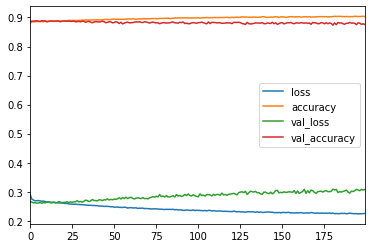

In [117]:
plt.figure(figsize=(10,6))
loss_df.plot()

In [118]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,matthews_corrcoef

In [119]:
predictions=model.predict_classes(x_test)
predictions

C:\Users\Shivam\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [120]:
print("Classification Report :")
print(classification_report(y_test,predictions))
print("Confusion Matrix : ")
print(confusion_matrix(y_test,predictions))
print("Roc Auc Score : ",roc_auc_score(y_test,predictions))
print("Matthews CorrCoef : ",matthews_corrcoef(y_test,predictions))

Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.54      0.63      4754
           1       0.89      0.96      0.93     18960

    accuracy                           0.88     23714
   macro avg       0.83      0.75      0.78     23714
weighted avg       0.87      0.88      0.87     23714

Confusion Matrix : 
[[ 2544  2210]
 [  741 18219]]
Roc Auc Score :  0.7480230172592834
Matthews CorrCoef :  0.5748830396824474


In [121]:
model.evaluate(x_test,y_test)

742/742 [==============================] - 1s 2ms/step - loss: 0.3076 - accuracy: 0.8756


[0.3075716197490692, 0.8755587339401245]

In [ ]:
#Part Two
#Second ANN Model 

In [122]:
#Keras Callbacks for improving our model.
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [123]:
new_model=my_basic_model()
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 78)                6162      
_________________________________________________________________
batch_normalization_2 (Batch (None, 78)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 39)                3081      
_________________________________________________________________
dropout_1 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 19)                760       
_________________________________________________________________
batch_normalization_3 (Batch (None, 19)                76        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [124]:
new_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=400,verbose=1,callbacks=[early_stop])

Epoch 1/400
865/865 [==============================] - 5s 4ms/step - loss: 0.3338 - accuracy: 0.8576 - val_loss: 0.2828 - val_accuracy: 0.8769
Epoch 2/400
865/865 [==============================] - 4s 4ms/step - loss: 0.2712 - accuracy: 0.8864 - val_loss: 0.2624 - val_accuracy: 0.8872
Epoch 3/400
865/865 [==============================] - 4s 4ms/step - loss: 0.2744 - accuracy: 0.8835 - val_loss: 0.2689 - val_accuracy: 0.8866
Epoch 4/400
865/865 [==============================] - 3s 4ms/step - loss: 0.2712 - accuracy: 0.8851 - val_loss: 0.2606 - val_accuracy: 0.8877
Epoch 5/400
865/865 [==============================] - 3s 3ms/step - loss: 0.2659 - accuracy: 0.8868 - val_loss: 0.2646 - val_accuracy: 0.8878
Epoch 6/400
865/865 [==============================] - 3s 4ms/step - loss: 0.2658 - accuracy: 0.8883 - val_loss: 0.2636 - val_accuracy: 0.8858
Epoch 7/400
865/865 [==============================] - 4s 4ms/step - loss: 0.2676 - accuracy: 0.8865 - val_loss: 0.2608 - val_accuracy: 0.8879

In [125]:
new_model.history.history

{'loss': [0.2902930974960327,
  0.27169591188430786,
  0.2709996700286865,
  0.26926615834236145,
  0.2677888572216034,
  0.26831966638565063,
  0.26770153641700745,
  0.26586735248565674,
  0.26629456877708435,
  0.2659071385860443,
  0.2647259831428528,
  0.2648690342903137,
  0.265004426240921,
  0.2634476125240326,
  0.2641235291957855,
  0.26235532760620117,
  0.2619483768939972,
  0.2622978985309601,
  0.2614139914512634,
  0.26116931438446045,
  0.26075589656829834,
  0.26062676310539246,
  0.2600865960121155,
  0.2596880793571472,
  0.2592460811138153,
  0.26004669070243835,
  0.2589184045791626,
  0.2579863667488098,
  0.25881123542785645,
  0.2576824128627777,
  0.25655660033226013,
  0.2566055953502655,
  0.25737464427948,
  0.25642403960227966,
  0.2558891773223877,
  0.25677236914634705,
  0.25515106320381165],
 'accuracy': [0.8799024224281311,
  0.8856136202812195,
  0.8861557841300964,
  0.886408805847168,
  0.886734127998352,
  0.8866799473762512,
  0.8864811062812805,


In [126]:
model_loss_df=pd.DataFrame(new_model.history.history)
model_loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.290293,0.879902,0.282830,0.876908
1,0.271696,0.885614,0.262432,0.887197
2,0.271000,0.886156,0.268870,0.886607
3,0.269266,0.886409,0.260605,0.887703
4,0.267789,0.886734,0.264623,0.887788


<Figure size 720x432 with 0 Axes>

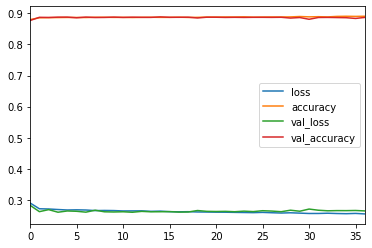

In [127]:
plt.figure(figsize=(10,6))
model_loss_df.plot()

In [128]:
prediction=new_model.predict_classes(x_test)
prediction

C:\Users\Shivam\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [129]:
print("Classification Report :")
print(classification_report(y_test,prediction))
print("Confusion Matrix : ")
print(confusion_matrix(y_test,prediction))
print("Roc Auc Score : ",roc_auc_score(y_test,prediction))
print("Matthews CorrCoef : ",matthews_corrcoef(y_test,prediction))

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.46      0.62      4754
           1       0.88      0.99      0.93     18960

    accuracy                           0.89     23714
   macro avg       0.92      0.73      0.78     23714
weighted avg       0.89      0.89      0.87     23714

Confusion Matrix : 
[[ 2173  2581]
 [  102 18858]]
Roc Auc Score :  0.7258545102591821
Matthews CorrCoef :  0.614065298986843


In [ ]:
#Check on random Customer for whether to give loan to particular customer or not.

In [130]:
import random
random.seed(101)
random_index=random.randint(0,len(df1))

In [131]:
new_customer=df1.drop('loan_repaid',axis=1).iloc[random_index]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [132]:
customer=new_customer.values.reshape(1,78)
customer

array([[2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
        3.0110e+01, 1.9960e+03, 1.6000e+01, 0.0000e+00, 2.7778e+04,
        6.5500e+01, 4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

In [133]:
customer=scaler.transform(customer)

In [134]:
new_prediction=new_model.predict_classes(customer)
new_prediction

C:\Users\Shivam\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [135]:
df1.iloc[random_index]['loan_repaid']

1.0

In [ ]:
#Conclusion: the actual value for loan repaid status for a particular customer is 1 "Fully Paid".
#& our ANN model also predicts value for loan repaid status for a that customer is {1:'Fully Paid'}.

In [ ]:
#Part 3
#Using Keras Classifier & GridSearchCV HyperParameter Optimization & Model Tuning.

In [136]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [137]:
model_CV=KerasClassifier(build_fn=my_basic_model,verbose=1)

In [138]:
batch_size=[64,128]
epochs=[200,400]
param_grid=dict(batch_size=batch_size,epochs=epochs)
print(param_grid)

{'batch_size': [64, 128], 'epochs': [200, 400]}


In [139]:
grid=GridSearchCV(estimator=model_CV,param_grid=param_grid,n_jobs=-1,verbose=1,scoring='recall',cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 22.8min finished


Epoch 1/200
865/865 [==============================] - 4s 3ms/step - loss: 0.3372 - accuracy: 0.8541
Epoch 2/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2709 - accuracy: 0.8860
Epoch 3/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2723 - accuracy: 0.8849
Epoch 4/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2680 - accuracy: 0.8871
Epoch 5/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2707 - accuracy: 0.8856
Epoch 6/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2677 - accuracy: 0.8863
Epoch 7/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2681 - accuracy: 0.8843
Epoch 8/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2689 - accuracy: 0.8867
Epoch 9/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2650 - accuracy: 0.8873
Epoch 10/200
865/865 [==============================] - 3s 3ms/step - loss: 0.2685 - accura

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F2534AFAC8>,
             iid='warn', n_jobs=-1,
             param_grid={'batch_size': [64, 128], 'epochs': [200, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [140]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.964102 using {'batch_size': 64, 'epochs': 200}


In [141]:
grid_predictions=grid.predict(x_test)
print(grid_predictions)

371/371 [==============================] - 1s 1ms/step
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [142]:
print("Classification Report :")
print(classification_report(y_test,grid_predictions))
print("Confusion Matrix : ")
print(confusion_matrix(y_test,grid_predictions))
print("Roc Auc Score : ",roc_auc_score(y_test,grid_predictions))
print("Matthews CorrCoef : ",matthews_corrcoef(y_test,grid_predictions))

Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      4754
           1       0.89      0.97      0.93     18960

    accuracy                           0.88     23714
   macro avg       0.84      0.74      0.78     23714
weighted avg       0.87      0.88      0.87     23714

Confusion Matrix : 
[[ 2469  2285]
 [  656 18304]]
Roc Auc Score :  0.7423764842042855
Matthews CorrCoef :  0.5737551473103316


In [155]:
gprediction=grid.predict(customer)
gprediction

1/1 [==============================] - 0s 21ms/step


array([[0]], dtype=int64)

In [ ]:
#Part4
#RandomizedSearchCV for Model Tuning & HyperParameter Optimization

In [143]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [144]:
random_search={'batch_size':[64,128],'epochs':[400,600]}
print(random_search)

{'batch_size': [64, 128], 'epochs': [400, 600]}


In [145]:
rdm_model=RandomizedSearchCV(estimator=model_CV,param_distributions=random_search,n_iter=100,cv=2,verbose=1,n_jobs=-1)
rdm_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 42.1min finished


Epoch 1/400
865/865 [==============================] - 4s 3ms/step - loss: 0.3319 - accuracy: 0.8582
Epoch 2/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2713 - accuracy: 0.8862
Epoch 3/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2714 - accuracy: 0.8861
Epoch 4/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2693 - accuracy: 0.8855
Epoch 5/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2699 - accuracy: 0.8866
Epoch 6/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2674 - accuracy: 0.8875
Epoch 7/400
865/865 [==============================] - 3s 3ms/step - loss: 0.2707 - accuracy: 0.8848
Epoch 8/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2666 - accuracy: 0.8872
Epoch 9/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2672 - accuracy: 0.8867
Epoch 10/400
865/865 [==============================] - 2s 3ms/step - loss: 0.2636 - accura

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F2534AFAC8>,
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'batch_size': [64, 128],
                                        'epochs': [400, 600]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [146]:
print("Best: %f using %s" % (rdm_model.best_score_,rdm_model.best_params_))

Best: 0.866835 using {'epochs': 400, 'batch_size': 64}


In [151]:
rdm_prediction=rdm_model.best_estimator_.predict(x_test)
rdm_prediction

371/371 [==============================] - 1s 1ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [152]:
print("Classification Report :")
print(classification_report(y_test,rdm_prediction))
print("Confusion Matrix : ")
print(confusion_matrix(y_test,rdm_prediction))
print("Roc Auc Score : ",roc_auc_score(y_test,rdm_prediction))
print("Matthews CorrCoef : ",matthews_corrcoef(y_test,rdm_prediction))

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.50      0.62      4754
           1       0.89      0.97      0.93     18960

    accuracy                           0.88     23714
   macro avg       0.85      0.74      0.77     23714
weighted avg       0.87      0.88      0.87     23714

Confusion Matrix : 
[[ 2393  2361]
 [  562 18398]]
Roc Auc Score :  0.7368621183316204
Matthews CorrCoef :  0.574238627262662


In [156]:
rdmprediction=rdm_model.predict(customer)
rdmprediction

1/1 [==============================] - 0s 25ms/step


C:\Users\Shivam\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int64)

In [ ]:
#Conclusion:
#the actual value for loan repaid status for a particular customer is 1 "Fully Paid".
#& our ANN model also predicts value for loan repaid status for a that customer is {1:'Fully Paid'}.